# Deep Learning
## HW1 - Problem 1 - Recommender System (100 + 20 pts)

### Please fill this part


1.   Full Name:Mohammadreza Estarki 
2.   Student Number: 400209184


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from math import sqrt


from sklearn.metrics import mean_squared_error

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change the address as you wish
plays = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning - HW1/data/user_artists.dat', sep='\t')
artists = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning - HW1/data/artists.dat', sep='\t', usecols=['id','name'])

# Preprocessing (20 pts)

In [ ]:
###############################################################################
## TODO: merge two DataSets in a way that below DataFrame is created         ##
###############################################################################
# First step: Changing input data form to DataFrame form 
plays=pd.DataFrame(plays)
artists=pd.DataFrame(artists)
# Second step: Before merging two dataset sort plays data by  artistID and userID
plays=plays.sort_values(by=['artistID','userID'])
# third step: Merging to dataset on same artistID and id 
ap=pd.merge(artists,plays,left_on=["id"],right_on=["artistID"])

In [ ]:
display(ap)

,id,name,userID,artistID,weight
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [ ]:
###############################################################################
## TODO: rename the weight columns to PlayCount         ##
###############################################################################
# Using rename func. to rename the weight column to playCount
ap = ap.rename(columns={"weight": "playCount"})
ap_copy=ap.copy() # Make copy of ap to use in last dataframe without droping id column

In [ ]:
###############################################################################
## TODO: Delete the "id" columns and reset_indexes of ap                     ##
###############################################################################
ap=ap.drop("id",axis=1)
ap=ap.reset_index(drop=True)
ap.head(10)

,name,userID,artistID,playCount
0,MALICE MIZER,34,1,212
1,MALICE MIZER,274,1,483
2,MALICE MIZER,785,1,76
3,Diary of Dreams,135,2,1021
4,Diary of Dreams,257,2,152
5,Diary of Dreams,325,2,3466
6,Diary of Dreams,397,2,56
7,Diary of Dreams,560,2,134
8,Diary of Dreams,580,2,803
9,Diary of Dreams,935,2,428


In [ ]:
###############################################################################
## TODO: Create  a Dataframe like below where "totalUniqueUsers" is the number of
## userID's assigned to each name in "ap" dataframe.
## "totalArtistPlays" is sum of all playcounts assigned to an artist  
## and sort the Frame in descending order of "totalArtistPlays" (highest "totalArtistPlays" at top of table) 
## and "avgUserPlays" is divison of "totalArtistPlays" by "totalUniqueUsers"  
###############################################################################

# First we calculate sum of playCount of each artist and prepare a sub-dataframe for making artist_rank dataframe
playCount_sum=ap.groupby('artistID')['playCount'].sum()
playCount_sum = pd.DataFrame(playCount_sum)
playCount_sum = playCount_sum.reset_index()
playCount_sum = playCount_sum.rename(columns={"playCount": "totalArtistPlays"})
artist_rank=pd.merge(artists[['name','id']],playCount_sum,left_on=["id"],right_on=["artistID"])
artist_rank=artist_rank.drop("id",axis=1)
artist_rank=artist_rank.drop("artistID",axis=1)

# Second we calculate totalUniqueUsers of each artist and prepare a sub-dataframe for making artist_rank dataframe
ap_name_value_counts=ap['name'].value_counts(dropna=False)
# converting to ap and assigning new names to the columns
ap_name_value_counts = pd.DataFrame(ap_name_value_counts)
ap_name_value_counts = ap_name_value_counts.reset_index()
ap_name_value_counts.columns = ['name', 'totalUniqueUsers'] # change columns names

# Finally we merging sub-dataframes and re-index them on name column
artist_rank=pd.merge(artist_rank,ap_name_value_counts,on=["name"])
artist_rank['avgUserPlays'] = artist_rank['totalArtistPlays']/artist_rank['totalUniqueUsers']
artist_rank=artist_rank.sort_values(by=['totalArtistPlays'],ascending=False)
artist_rank=artist_rank.iloc[:,[0,2,1,3]]
artist_rank=artist_rank.set_index("name")

In [ ]:
artist_rank

,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148
...,...,...,...
K-Precise,1,1,1.000000
ZÜNDER,1,1,1.000000
Evil Masquerade,1,1,1.000000


In [ ]:
###############################################################################
## TODO: Create  a Dataframe like below where for each name in ap dataframe,
# corresponding row in artist rank is attached to it  
###############################################################################
ap=pd.merge(ap_copy,artist_rank,on=['name'])
ap=ap.sort_values(by=['playCount'],ascending=False)  # Sort dataframe according to playCount 

In [ ]:
ap.head(20)

,id,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,72,Depeche Mode,1642,72,352698,282,1301308,4614.567376
35843,792,Thalía,2071,792,324663,26,350035,13462.884615
27302,511,U2,1094,511,320725,185,493024,2664.994595
8152,203,Blur,1905,203,257978,114,318221,2791.412281
26670,498,Paramore,1664,498,227829,399,963449,2414.659148
21191,378,Evanescence,1146,378,203165,226,513476,2272.017699
14165,292,Christina Aguilera,514,292,176133,407,1058405,2600.503686
33309,701,Shakira,1983,701,172496,319,688529,2158.398119
33127,701,Shakira,757,701,169596,319,688529,2158.398119
31835,679,Glee Cast,1086,679,165902,249,506453,2033.947791


# Exploration

In [ ]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots();
    fig.set_size_inches(16, 5);
    ax = sns.barplot(x[:20], y[:20], palette='Blues_r');
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    ax.set_title(title);
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))));

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12);

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right');

    plt.xticks(rotation=90);
    plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


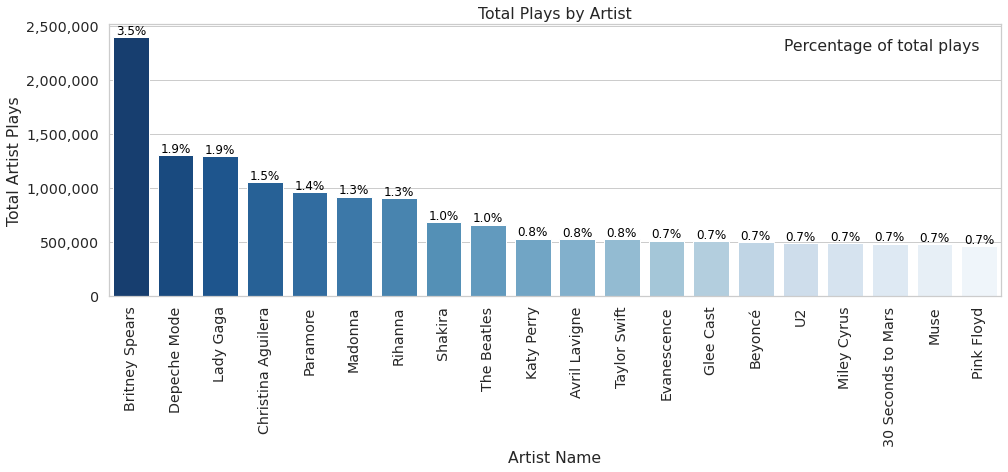

In [ ]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


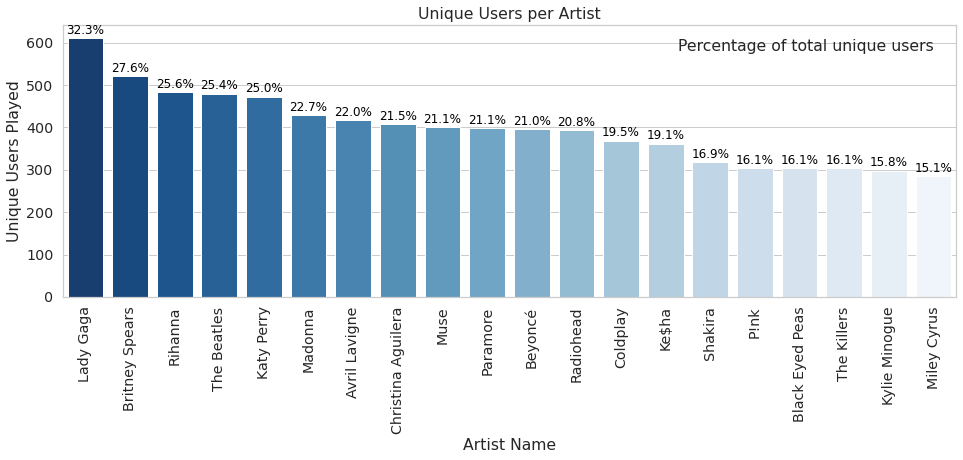

In [ ]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = ap.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


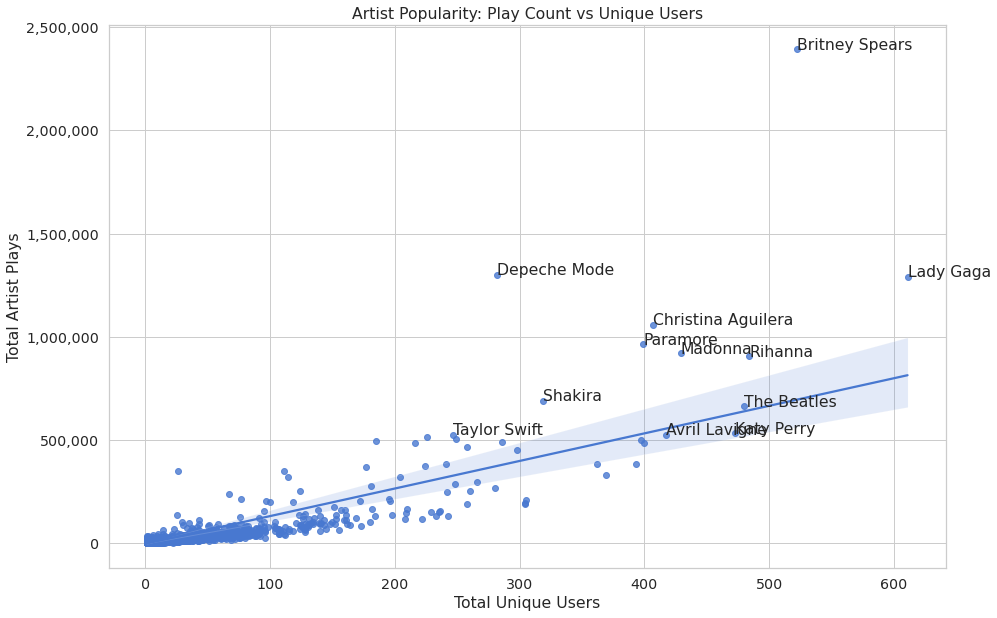

In [ ]:
top_artists =artist_rank.take(range(12)).index  # TODO : index of top 12 items in "artist_rank" based on their "totalArtistPlays"

x = artist_rank.totalUniqueUsers   # TODO : "totalUniqueUsers" of "artist_rank"
y = artist_rank.totalArtistPlays   # TODO :  "totalArtistPlays" of "artist_rank"
labels = artist_rank.index # TODO : index of "artist_rank"

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x,y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))

# Preprocessing (30 pts)

In [ ]:
pc = ap.playCount 
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)

In [ ]:
ap

,id,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays,playCountScaled
2800,72,Depeche Mode,1642,72,352698,282,1301308,4614.567376,1.000000
35843,792,Thalía,2071,792,324663,26,350035,13462.884615,0.920513
27302,511,U2,1094,511,320725,185,493024,2664.994595,0.909347
8152,203,Blur,1905,203,257978,114,318221,2791.412281,0.731441
26670,498,Paramore,1664,498,227829,399,963449,2414.659148,0.645960
...,...,...,...,...,...,...,...,...,...
38688,913,Destiny's Child,1810,913,1,83,34746,418.626506,0.000000
32955,697,Sia,1290,697,1,56,27597,492.803571,0.000000
71811,4988,Chris Spheeris,510,4988,1,5,3106,621.200000,0.000000
91319,17080,Haylie Duff,1851,17080,1,1,1,1.000000,0.000000


In [ ]:
###############################################################################
## TODO: Create  a Dataframe with userID as its rows, artistID as its columns and
## "play_count_scaled" as the value of each cell, in this manner you're creating
## a table which demonstrates what rating each user has for a set of items(artists)
## Your created table should be like below example
###############################################################################
ratings_df=ap.pivot(index="userID", columns="artistID",values="playCountScaled")

In [ ]:
ratings_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
###############################################################################
# TODO: Fill each NaN value with 0 and return a numpy array corresponding modified DataFrame
###############################################################################
# First we use fillna commend to fill NaN values with zero and return values as a numpy array
ratings = ratings_df.fillna(0).values

In [ ]:
###############################################################################
# TODO : Calculate how sparse your data is (in percent) and print it, meaning 
# what fraction of the above table is filled with observed values.
###############################################################################

## Your Code
# In this section, firstly we calculate number of non-zero and zeros values in ratings array and then calculate sparsity among dataset
Num_observed_value=len(ratings.nonzero()[0])
Num_zero_value=np.sum(ratings==0)
sparse_per=100* Num_observed_value/(Num_zero_value+Num_observed_value)
print("{} % of rating table is filled with observed values".format(sparse_per))
## END

0.2763750225421394 % of rating table is filled with observed values


# Fitting(Training) Model (50pts)

In [ ]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15

###############################################################################
# TODO : Complete the below function in way that, getting ratings array, creates
# two same size arrays as train and validation, and for the users in ratings array
# that have at least "MIN_USER_RATINGS" observed ratings, choose "DELETE_RATING_COUNT"
# of these ratings, make them zero in train table and put them in validation table
# return train and validation tables
###############################################################################

def train_test_split(ratings):
    # As mentioned before train matrix is equal to the rating matrix 
    # unless it has a 35 non-zero value in a row. In this situation we
    # replace 15 value of it with zero and add that values to validation matrix
    train=ratings.copy()
    validation=np.zeros(ratings.shape)
    # Now we use a loop to check every row of rating table 
    for userID in np.arange(ratings.shape[0]):
      NON_Zero_rating=ratings[userID,:].nonzero()[0]  # Number of rating value in each row
      len_non_zero_val=len(NON_Zero_rating)
      if len_non_zero_val >= MIN_USER_RATINGS:
        # In this section we select randomly vetcor with size of  DELETE_RATING_COUNT
        valid_row = np.random.choice(NON_Zero_rating,size=DELETE_RATING_COUNT,replace=False)
    # Then according to the vector replace rating with validation matrix and replace train matrix with zero  
    train[userID, valid_row] = 0
    validation[userID, valid_row] = ratings[userID, valid_row]
    return train, validation

In [ ]:
train, val = train_test_split(ratings)

In [ ]:
###############################################################################
# TODO : Complete below function in a way to return sqrt value of "mean_squared_error"
# between non-zero(observed) values of ground_truth and prediction. Note that you sould
# care about observed values of ground_truth table not prediction!
###############################################################################
def rmse(prediction, ground_truth):
    obs_val=ground_truth.nonzero()
    prediction = prediction[obs_val].flatten()
    ground_truth = ground_truth[obs_val].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [ ]:
class Recommender:
  
  def __init__(self, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001):
    self.n_epochs = n_epochs
    self.n_latent_features = n_latent_features
    self.lmbda = lmbda
    self.learning_rate = learning_rate
  
  def predictions(self, P, Q):
    #TODO : create the prediction matrix
        prediction_mat=P.T@ Q
        return prediction_mat
  
  def fit(self, X_train, X_val):
    #TODO : Learn the model(P and Q) based on paper, you can initialize them with random gaussians
    #TODO : save the loss on train and validation data in each iteration
      p_init= np.random.rand(self.n_latent_features, X_train.shape[0])
      q_init= np.random.rand(self.n_latent_features, X_train.shape[1])
      self.P = p_init
      self.Q = q_init
      userID, artistID = X_train.nonzero()
      self.loss_train=[]
      self.loss_valid=[]
      # According to the given paper we using Stochastic gradient descent over n_epochs
      for epoch in range(self.n_epochs):
        for u, i in zip(userID, artistID):
          # First of all we predict system with r_ui that is P.T @ Q according to the last epoch
          r_pred_ui=self.predictions(self.P[:,u], self.Q[:,i])
          # Secondly computes the associated error e_ui
          e_ui = X_train[u, i] - r_pred_ui
          # Then update P and Q according to the paper
          self.P[:, u] += self.learning_rate* (e_ui* self.Q[:, i]- self.lmbda* self.P[:, u])
          self.Q[:, i] += self.learning_rate* (e_ui* self.P[:, u]- self.lmbda* self.Q[:, i])
        
        # Compute prediction with updated P and Q
        predict_val_dummy=self.predictions(self.P, self.Q)
        # Compute loss on train and validation with rmse and save them on self
        self.loss_train.append(rmse(predict_val_dummy, X_train))
        self.loss_valid.append(rmse(predict_val_dummy, X_val))
      return self


  def predict(self, X_train, user_index):
     #TODO : return predicted ratings for unobserved values of specific user index
     # First of all we use P and Q to creat rating matrix
      P_i=self.P
      Q_i=self.Q
      r_ui = self.predictions(P_i, Q_i)
      # Then according to user_index, find the index that X_train must be zero
      pred_index = np.where(X_train[user_index, :] == 0)[0]
      # Finally predict rating of that id according to user_index and prediction_index 
      pred=r_ui[user_index, pred_index].flatten()
      return pred
  

In [ ]:
#creating recommender object
# Approximatly it takes 7m 34s to train
recommender =Recommender().fit(train, val)
print("Final results of Loss Train is :{:.5f}\nFinal results of Loss Validation is :{:.5f}".format(recommender.loss_train[-1],recommender.loss_valid[-1]))

Final results of Loss Train is :0.02614
Final results of Loss Validation is :0.04899


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:529: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the f

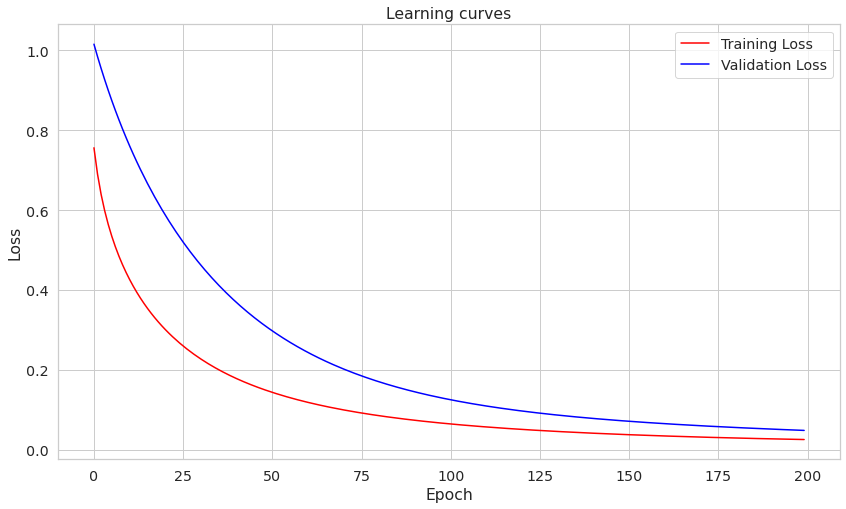

In [ ]:
###############################################################################
# TODO : Plot the loss of train and loss
###############################################################################
plt.title('Learning curves')
plt.xlabel("Epoch")
plt.ylabel("Loss")
sns.lineplot(range(recommender.n_epochs), recommender.loss_train, label = 'Training Loss',c="red")
sns.lineplot(range(recommender.n_epochs), recommender.loss_valid, label = 'Validation Loss',c="blue")

# Bonus
**Can you improve the accuracy of model? If so, Do it and explain why it imporved! (Note that improvement must be noticable) (+10 pts)**

# Making recommendations

In [ ]:
user_id = 1236
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]

rating_predictions = recommender.predict(train, user_index)

In [ ]:
def create_artist_ratings(artists_df, artists_index, ratings, n=10):
  artist_ids = ratings_df.columns[artists_index]
  artist_ratings = pd.DataFrame(data=dict(artistId=artist_ids, rating=ratings))
  top_n_artists = artist_ratings.sort_values("rating", ascending=False).head(n)
  
  artist_recommendations = artists_df[artists_df.id.isin(top_n_artists.artistId)].reset_index(drop=True)
  artist_recommendations['rating'] = pd.Series(top_n_artists.rating.values)
  return artist_recommendations.sort_values("rating", ascending=False)

In [ ]:
existing_ratings_index = np.where(train[user_index, :] > 0)[0]
existing_ratings = train[user_index, existing_ratings_index]

create_artist_ratings(artists, existing_ratings_index, existing_ratings)

,id,name,rating
0,7,Marilyn Manson,0.196486
1,475,Eminem,0.052734
2,614,Pearl Jam,0.043204
3,978,Disturbed,0.042016
4,1104,Rammstein,0.029742
5,1118,A Perfect Circle,0.029031
6,1131,Tool,0.025657
7,2172,Gojira,0.021690
8,2479,Twiztid,0.021562
9,6257,Rob Zombie,0.020879


In [ ]:
# Your Systems Recommendation for specific user_id on its unobserved ratings:
create_artist_ratings(artists, predictions_index, rating_predictions)

,id,name,rating
0,5409,Duane Eddy,0.102593
1,5676,Farid Bang,0.101942
2,8921,Youth of Today,0.101092
3,9486,Scarlet Soho,0.101056
4,10106,Stockholm Monsters,0.100667
5,10498,Plush Fish,0.100457
6,10624,Joni James,0.100420
7,15904,We Smoke Fags,0.100238
8,16866,The Rebs,0.099886
9,18696,Hakan Yeşilyurt,0.099406


# Bonus
**Whatever innovation you can the on representing results of your system visually (+5 pts, note that top visualizations in sense of innovation will get the point)**